In [ ]:
!git clone https://github.com/xinychen/transdim.git

Cloning into 'transdim'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 2655 (delta 179), reused 172 (delta 82), pack-reused 2371
Receiving objects: 100% (2655/2655), 192.69 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (1603/1603), done.
Checking out files: 100% (174/174), done.


In [ ]:
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
import warnings
import logging
import importlib
from sklearn.utils import check_array


#import required packages
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
uploaded = files.upload()

NameError: ignored

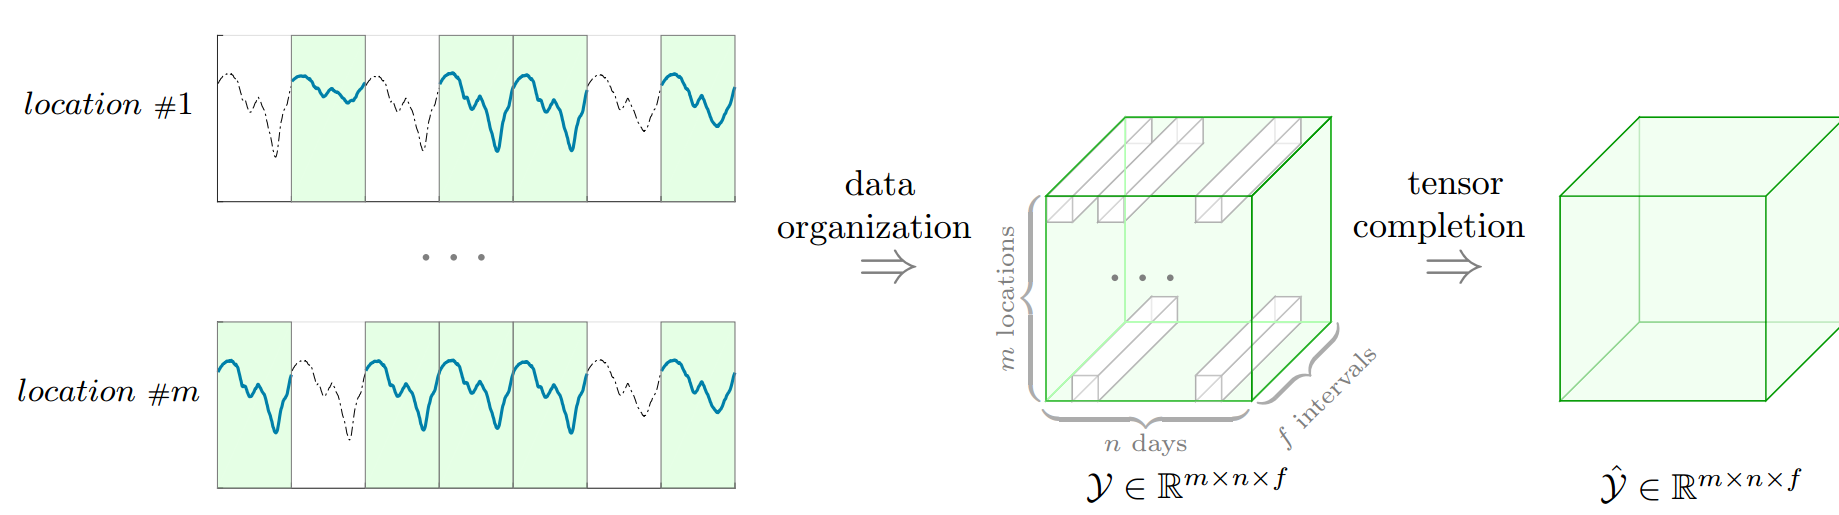

In [ ]:
Image("tensor.png", width=1000)

# Data wrangling

In [ ]:
# path = '/content/drive/MyDrive/IMT Atlantique/Project_S5_Air/air-polution-sensor/data/sensorv3'

# super_df = pd.DataFrame()
# dir_files = np.array(os.listdir(path))
#a=0

# for file in dir_files:
#   super_df = pd.concat([super_df , pd.read_csv(path + '/' + file)])

# super_df.rename(columns={'Name' : 'Sensor'}, inplace=True)
# super_df = super_df.replace(400, np.nan)

# super_df.to_csv('/content/drive/MyDrive/IMT Atlantique/Project_S5_Air/air-polution-sensor/data/dfv3.csv')

In [ ]:
# for i, j in zip(range(0, super_df.shape[0], 743), range(0, len(dir_files))):
#   super_df['Sensor'][i: i + 744] = dir_files[j] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# jupyter Notebook

# super_df =  pd.read_csv('./data/dfv3.csv', header=0, index_col=0)
# #aux = super_df[(super_df['Sensor'] == 'sensor14v2.csv') | (super_df['Sensor'] == 'sensor13v2.csv') | (super_df['Sensor'] == 'sensor12v2.csv') | (super_df['Sensor'] == 'sensor11v2.csv') | (super_df['Sensor'] == 'sensor10v2.csv') | (super_df['Sensor'] == 'sensor9v2.csv') | (super_df['Sensor'] == 'sensor8v2.csv') | (super_df['Sensor'] == 'sensor7v2.csv') ]
# aux = super_df.copy(deep=True)

In [ ]:
#Colab

super_df =  pd.read_csv('/content/drive/MyDrive/IMT Atlantique/Project_S5_Air/air-polution-sensor/data/dfv3.csv', header=0, index_col=0)
aux = super_df.copy(deep=True)

31 % NaN values

In [ ]:
aux = pd.pivot_table(data=aux,values='PM2_MOY',index='Sensor',columns= ['Date', 'Hour'])
#aux = aux.fillna(method='bfill')
#aux = aux.dropna(axis= 1)
columnst = aux.columns
indext = aux.index

In [ ]:
aux.isnull().sum().sum()

6111

In [ ]:
aux= aux.T.reset_index(drop=True).T
aux.reset_index()

,Sensor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587
0,sensor01,17.0,17.0,17.0,17.0,16.0,16.0,16.0,16.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0,NaN,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,17.0,17.0,NaN,NaN,17.0,17.0,17.0,17.0,17.0,18.0,18.0,...,NaN,4.0,4.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,5.0,5.0
1,sensor05,13.0,13.0,12.0,12.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,7.0,6.0,NaN,5.0,5.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,34.0,...,NaN,6.0,5.0,5.0,NaN,5.0,5.0,NaN,NaN,5.0,NaN,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,sensor06,17.0,17.0,17.0,17.0,17.0,17.0,17.0,16.0,16.0,16.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,NaN,15.0,NaN,NaN,16.0,16.0,16.0,NaN,16.0,NaN,NaN,16.0,16.0,NaN,17.0,NaN,17.0,17.0,17.0,17.0,17.0,NaN,...,NaN,NaN,6.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,6.0,6.0,5.0,4.0,4.0,4.0,4.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,NaN,6.0,7.0
3,sensor07,NaN,18.0,18.0,18.0,17.0,NaN,16.0,16.0,16.0,NaN,16.0,16.0,15.0,15.0,NaN,NaN,15.0,NaN,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,NaN,NaN,17.0,17.0,17.0,17.0,17.0,17.0,17.0,...,NaN,NaN,6.0,6.0,6.0,6.0,6.0,6.0,NaN,5.0,NaN,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,sensor08,17.0,17.0,16.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0,NaN,16.0,16.0,16.0,16.0,16.0,16.0,NaN,17.0,17.0,17.0,17.0,17.0,NaN,NaN,NaN,18.0,18.0,18.0,NaN,18.0,NaN,...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0
5,sensor09,14.0,14.0,14.0,14.0,13.0,13.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,13.0,13.0,NaN,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,NaN,NaN,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,NaN,NaN,5.0,5.0,NaN,5.0,4.0,4.0,NaN,NaN,4.0,4.0,4.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,NaN,3.0,3.0,3.0,3.0,4.0,4.0,NaN,4.0,NaN,4.0,4.0,4.0,4.0,4.0
6,sensor10,NaN,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,NaN,19.0,19.0,19.0,19.0,19.0,NaN,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,NaN,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,NaN,19.0,18.0,18.0,17.0,17.0,17.0,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0
7,sensor11,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,NaN,20.0,20.0,20.0,NaN,19.0,19.0,NaN,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,NaN,NaN,NaN,19.0,NaN,19.0,20.0,20.0,20.0,...,NaN,8.0,8.0,8.0,NaN,8.0,8.0,8.0,NaN,7.0,NaN,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0
8,sensor12,22.0,22.0,22.0,22.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,20.0,NaN,19.0,19.0,NaN,19.0,19.0,19.0,19.0,19.0,19.0,NaN,19.0,19.0,NaN,NaN,19.0,19.0,19.0,19.0,19.0,20.0,NaN,...,NaN,NaN,4.0,4.0,4.0,4.0,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,NaN,5.0,6.0,6.0,6.0,6.0,6.0,6.0
9,sensor13,15.0,15.0,15.0,15.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,NaN,14.0,14.0,14.0,14.0,14.0,14.0,14.0,15.0,15.0,15.0,15.0,15.0,NaN,16.0,NaN,16.0,16.0,16.0,16.0,16.0,16.0,...,NaN,6.0,6.0,6.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
aux.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587
count,34.000000,41.000000,41.000000,41.000000,41.000000,40.000000,41.000000,41.000000,41.000000,40.000000,40.00000,39.000000,37.000000,39.000000,39.000000,36.000000,41.000000,7.000000,41.000000,40.000000,19.000000,40.000000,41.000000,37.000000,36.000000,38.000000,35.000000,37.000000,39.000000,40.000000,17.000000,21.000000,15.000000,41.000000,33.000000,39.000000,38.000000,42.000000,20.000000,40.000000,...,5.0000,18.000000,36.000000,38.000000,11.000000,36.000000,39.000000,39.000000,11.000000,37.000000,15.00000,40.000000,40.00000,40.000000,34.000000,40.000000,39.000000,39.000000,39.000000,40.000000,40.000000,40.000000,40.000000,28.000000,38.000000,40.000000,41.000000,42.000000,42.000000,42.000000,41.000000,42.000000,33.000000,42.000000,37.000000,41.000000,41.000000,36.000000,41.000000,40.00000
mean,16.235294,16.341463,16.073171,16.024390,15.390244,15.175000,14.878049,14.804878,14.756098,14.675000,14.75000,14.692308,15.000000,15.025641,15.205128,15.361111,15.268293,15.571429,15.292683,15.300000,15.105263,15.350000,15.414634,15.405405,15.444444,15.868421,16.171429,16.324324,16.333333,16.525000,17.352941,17.238095,16.400000,17.707317,18.242424,17.974359,17.973684,18.452381,18.350000,18.525000,...,8.4000,6.277778,6.388889,6.421053,7.636364,6.333333,6.076923,5.948718,6.636364,5.891892,5.40000,5.600000,5.42500,5.200000,4.764706,4.600000,4.666667,4.615385,4.589744,4.650000,4.650000,4.675000,4.700000,4.892857,4.631579,4.525000,4.463415,4.404762,4.428571,4.476190,4.609756,4.690476,4.878788,4.880952,5.486486,5.292683,5.317073,5.250000,5.219512,5.17500
std,2.000891,2.092961,2.195339,2.241515,2.289957,2.319234,2.420693,2.389765,2.332172,2.335759,2.32875,2.117022,2.185813,2.083610,2.307647,2.356181,2.202548,1.397276,2.304820,2.441101,1.882514,2.517121,2.509737,2.671448,2.761412,2.772169,1.854814,1.811293,1.796683,1.853444,2.206274,1.640267,2.063284,2.951643,2.989882,3.064973,3.300179,3.989024,4.416178,4.006325,...,6.0663,3.443759,3.391399,3.301364,5.696889,3.430952,3.436527,3.501494,4.945154,3.657441,4.01426,3.571971,3.42605,3.465582,3.593418,3.364978,3.382099,3.159075,3.159930,3.109539,3.008961,2.999038,2.988868,3.541702,3.122898,2.873285,2.766745,2.669242,2.538896,2.549396,2.322478,2.268427,2.341975,2.166287,1.894753,1.792260,1.822622,1.696635,1.724996,1.64687
min,11.000000,10.000000,10.000000,10.000000,9.000000,9.000000,8.000000,8.000000,9.000000,9.000000,9.00000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,14.000000,7.000000,6.000000,10.000000,5.000000,5.000000,4.000000,4.000000,3.000000,11.000000,11.000000,11.000000,11.000000,12.000000,15.000000,12.000000,12.000000,14.000000,12.000000,12.000000,12.000000,12.000000,13.000000,...,4.0000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.00000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
25%,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000,13.000000,13.000000,13.000000,13.000000,13.75000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000,15.000000,14.750000,15.000000,15.000000,15.000000,15.000000,14.750000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,15.000000,16.000000,17.000000,16.500000,16.000000,16.250000,16.000000,17.000000,...,5.0000,4.250000,4.750000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00000,3.750000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.0

In [ ]:
super_df.describe()

,Hour,PM2_MIN,PM2_MAX,PM2_MOY
count,31992.000000,19173.000000,19173.000000,19173.000000
mean,11.500000,9.778073,13.238147,11.254942
std,6.922295,4.642558,4.604551,4.423951
min,0.000000,0.000000,0.000000,0.000000
25%,5.750000,6.000000,10.000000,8.000000
50%,11.500000,10.000000,13.000000,11.000000
75%,17.250000,13.000000,17.000000,14.000000
max,23.000000,34.000000,35.000000,34.000000


In [ ]:
aux.shape 

(43, 588)

In [ ]:
LI = aux.interpolate(method='linear')

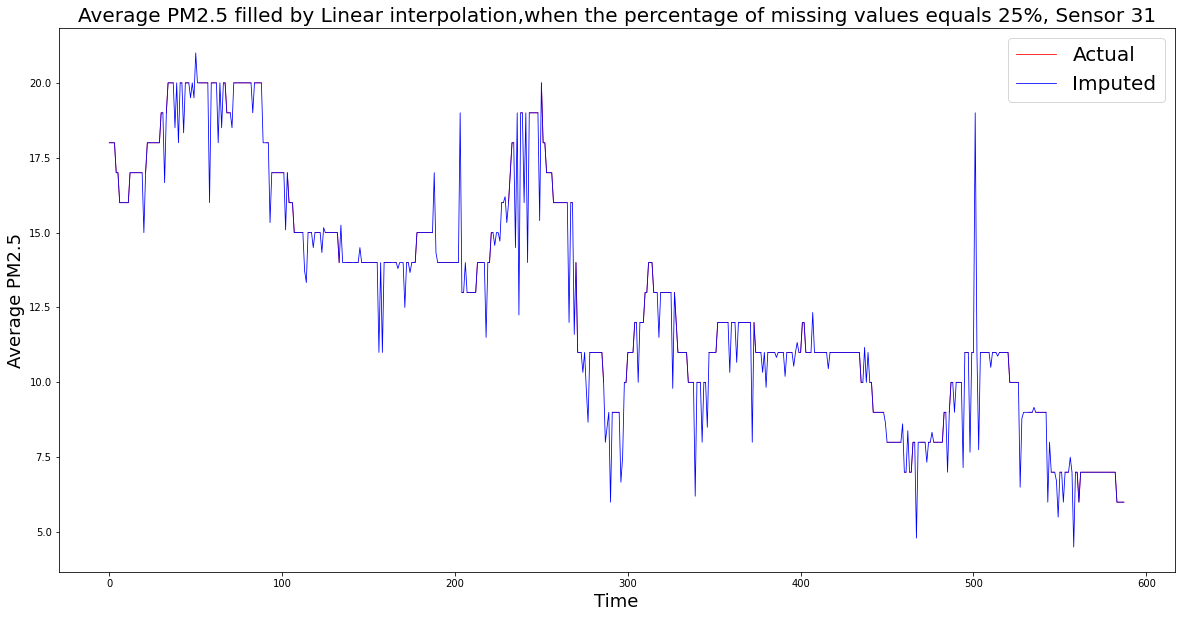

In [ ]:
#sensor 31-33-34
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(aux.T['sensor31'], 'r', label='Actual', linewidth=0.8)
plt.plot(LI.T['sensor31'], 'b', label='Imputed', linewidth=0.8)
plt.title('Average PM2.5 filled by Linear interpolation,when the percentage of missing values equals 25%, Sensor 31', size=20)
#plt.title('Original average PM2.5 with a percentaje of missing values equals 25%, Sensor 31', size=20)
plt.xlabel('Time',size=18)
plt.ylabel('Average PM2.5',size=18)
#plt.legend(['Actual', 'Imputed'], fontsize=20)
plt.legend(fontsize=20)

In [ ]:
f = 25 # window of the time series
outTensor = np.array([]).reshape(aux.shape[0], 0, f)

for t in range(0, aux.shape[1], f):
  auxTenso = aux.values[:,t:t+f][:, None]
  auxTenso = np.pad(auxTenso, ((0,0),(0,0),(0,f-auxTenso.shape[2])), mode='constant')
  outTensor = np.append(outTensor, auxTenso, axis = 1)
print(outTensor.shape)

(43, 24, 25)


In [ ]:
np.isnan(outTensor).sum()/np.prod(outTensor.shape)

0.23686046511627906

In [ ]:
def plotTs(actual, imputed, title):
  plt.figure(figsize=(20,10))
  plt.plot(actual, 'r', label='Actual', linewidth=0.8)
  plt.plot(imputed, 'b', label='Imputated', linewidth=0.8 )
  plt.title(title, size = 20)
  plt.xlabel('Time',size=18)
  plt.ylabel('Average PM2.5',size=18)
  plt.legend(fontsize=20)
  plt.show()

# BPMF

In [ ]:
!pip install -U scipy

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.1)


In [ ]:

import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from numpy.linalg import solve as solve
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

In [ ]:
def sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau, beta0 = 1, vargin = 0):
    """Sampling N-by-R factor matrix W and its hyperparameters (mu_w, Lambda_w)."""
    
    dim1, rank = W.shape
    W_bar = np.mean(W, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_mu_hyper = temp * W_bar
    var_W_hyper = inv(np.eye(rank) + cov_mat(W, W_bar) + temp * beta0 * np.outer(W_bar, W_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_W_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim1 + beta0) * var_Lambda_hyper)
    
    if dim1 * rank ** 2 > 1e+8:
        vargin = 1
    
    if vargin == 0:
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = (var2 @ tau_ind.T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, np.newaxis]
        var4 = var1 @ tau_sparse_mat.T + (var_Lambda_hyper @ var_mu_hyper)[:, np.newaxis]
        for i in range(dim1):
            W[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
    elif vargin == 1:
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            var_mu = tau * Xt.T @ sparse_mat[i, pos0[0]] + var_Lambda_hyper @ var_mu_hyper
            var_Lambda = tau * Xt.T @ Xt + var_Lambda_hyper
            W[i, :] = mvnrnd_pre(solve(var_Lambda, var_mu), var_Lambda)
    
    return W

In [ ]:
def sample_factor_x(tau_sparse_mat, tau_ind, W, X, beta0 = 1):
    """Sampling T-by-R factor matrix X and its hyperparameters (mu_x, Lambda_x)."""
    
    dim2, rank = X.shape
    X_bar = np.mean(X, axis = 0)
    temp = dim2 / (dim2 + beta0)
    var_mu_hyper = temp * X_bar
    var_X_hyper = inv(np.eye(rank) + cov_mat(X, X_bar) + temp * beta0 * np.outer(X_bar, X_bar))
    var_Lambda_hyper = wishart.rvs(df = dim2 + rank, scale = var_X_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim2 + beta0) * var_Lambda_hyper)
    
    
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ tau_ind).reshape([rank, rank, dim2]) + var_Lambda_hyper[:, :, np.newaxis]
    var4 = var1 @ tau_sparse_mat + (var_Lambda_hyper @ var_mu_hyper)[:, np.newaxis]
    for t in range(dim2):
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t]), var3[:, :, t])

    return X

In [ ]:
def sample_precision_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind)
    return np.random.gamma(var_alpha, 1 / var_beta)

In [ ]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [ ]:

def BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter):
    """Bayesian Probabilistic Matrix Factorization, BPMF."""
    
    dim1, dim2 = sparse_mat.shape
    W = init["W"]
    X = init["X"]
    if np.isnan(sparse_mat).any() == False:
        ind = sparse_mat != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_mat != 0) & (sparse_mat == 0))
    elif np.isnan(sparse_mat).any() == True:
        pos_test = np.where((dense_mat != 0) & (np.isnan(sparse_mat)))
        ind = ~np.isnan(sparse_mat)
        pos_obs = np.where(ind)
        sparse_mat[np.isnan(sparse_mat)] = 0
    dense_test = dense_mat[pos_test]
    del dense_mat
    tau = 1
    W_plus = np.zeros((dim1, rank))
    X_plus = np.zeros((dim2, rank))
    temp_hat = np.zeros(sparse_mat.shape)
    show_iter = 200
    mat_hat_plus = np.zeros(sparse_mat.shape)
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau * ind
        tau_sparse_mat = tau * sparse_mat
        W = sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau)
        X = sample_factor_x(tau_sparse_mat, tau_ind, W, X)
        mat_hat = W @ X.T
        tau = sample_precision_tau(sparse_mat, mat_hat, ind)
        temp_hat += mat_hat
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat[pos_test])))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat[pos_test])))
            temp_hat = np.zeros(sparse_mat.shape)
            print()
        if it + 1 > burn_iter:
            W_plus += W
            X_plus += X
            mat_hat_plus += mat_hat
    mat_hat = mat_hat_plus / gibbs_iter
    W = W_plus / gibbs_iter
    X = X_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, mat_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, mat_hat[pos_test])))
    print()
    
    return mat_hat, W, X

## Non-random missing (NM) tests 

In [ ]:
#Guangzhou Dataset Transdim

# tensor = scipy.io.loadmat('./data/tensor.mat')['tensor']
# random_matrix = scipy.io.loadmat('./data/random_matrix.mat')['random_matrix']
# random_tensor = scipy.io.loadmat('./data/random_tensor.mat')['random_tensor']

# tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/tensor.mat')['tensor']
# random_matrix = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_matrix.mat')['random_matrix']
# random_tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_tensor.mat')['random_tensor']

In [ ]:
import scipy.io



tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.4

## Non-random missing (NM)
binary_tensor = np.zeros(tensor.shape)
for i1 in range(tensor.shape[0]):
    for i2 in range(tensor.shape[1]):
        binary_tensor[i1, i2, :] = np.round(random_matrix[i1, i2] + 0.5 - missing_rate)
binary_mat = binary_tensor.reshape([binary_tensor.shape[0], binary_tensor.shape[1] * binary_tensor.shape[2]])
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
tensor.shape

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 60
init = {"W": 0.01 * np.random.randn(dim1, rank), "X": 0.01 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X = BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

## Random Mising Test 

In [ ]:
import scipy.io

tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0

## Random missing (RM)
binary_mat = (np.round(random_tensor + 0.5 - missing_rate)
              .reshape([random_tensor.shape[0], random_tensor.shape[1] * random_tensor.shape[2]]))
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 80
init = {"W": 0.1 * np.random.randn(dim1, rank), "X": 0.1 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X = BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: nan
RMSE: nan

Iter: 400
MAPE: nan
RMSE: nan

Iter: 600
MAPE: nan
RMSE: nan

Iter: 800
MAPE: nan
RMSE: nan

Iter: 1000
MAPE: nan
RMSE: nan

Imputation MAPE: nan
Imputation RMSE: nan

Running time: 436 seconds


In [ ]:
dense_mat.shape

(43, 600)

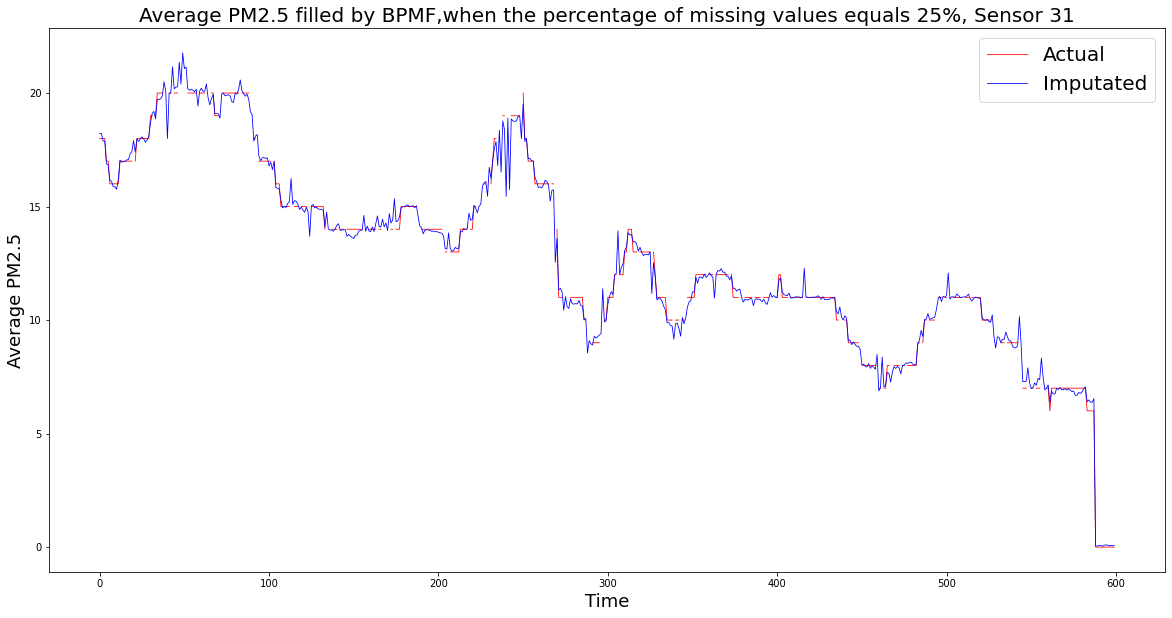

In [ ]:
plotTs(dense_mat[25], mat_hat[25], title='Average PM2.5 filled by BPMF,when the percentage of missing values equals 25%, Sensor 31')

# Bayesian Temporal Matrix Factorization (**BTMF**)

In [ ]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from scipy.stats import invwishart
from numpy.linalg import solve as solve
from numpy.linalg import cholesky as cholesky_lower
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

In [ ]:
def sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau, beta0 = 1, vargin = 0):
    """Sampling N-by-R factor matrix W and its hyperparameters (mu_w, Lambda_w)."""
    
    dim1, rank = W.shape
    W_bar = np.mean(W, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_W_hyper = inv(np.eye(rank) + cov_mat(W, W_bar) + temp * beta0 * np.outer(W_bar, W_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_W_hyper)
    var_mu_hyper = mvnrnd_pre(temp * W_bar, (dim1 + beta0) * var_Lambda_hyper)
    
    if dim1 * rank ** 2 > 1e+8:
        vargin = 1
    
    if vargin == 0:
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = (var2 @ tau_ind.T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, None]
        var4 = var1 @ tau_sparse_mat.T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
        for i in range(dim1):
            W[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
    elif vargin == 1:
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            var_mu = tau[i] * Xt.T @ sparse_mat[i, pos0[0]] + var_Lambda_hyper @ var_mu_hyper
            var_Lambda = tau[i] * Xt.T @ Xt + var_Lambda_hyper
            W[i, :] = mvnrnd_pre(solve(var_Lambda, var_mu), var_Lambda)
    
    return W

In [ ]:
def mnrnd(M, U, V):
    """
    Generate matrix normal distributed random matrix.
    M is a m-by-n matrix, U is a m-by-m matrix, and V is a n-by-n matrix.
    """
    dim1, dim2 = M.shape
    X0 = np.random.randn(dim1, dim2)
    P = cholesky_lower(U)
    Q = cholesky_lower(V)
    
    return M + P @ X0 @ Q.T

def sample_var_coefficient(X, time_lags):
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    
    Z_mat = X[tmax : dim, :]
    Q_mat = np.zeros((dim - tmax, rank * d))
    for k in range(d):
        Q_mat[:, k * rank : (k + 1) * rank] = X[tmax - time_lags[k] : dim - time_lags[k], :]
    var_Psi0 = np.eye(rank * d) + Q_mat.T @ Q_mat
    var_Psi = inv(var_Psi0)
    var_M = var_Psi @ Q_mat.T @ Z_mat
    var_S = np.eye(rank) + Z_mat.T @ Z_mat - var_M.T @ var_Psi0 @ var_M
    Sigma = invwishart.rvs(df = rank + dim - tmax, scale = var_S)
    
    return mnrnd(var_M, var_Psi, Sigma), Sigma

In [ ]:
def sample_factor_x(tau_sparse_mat, tau_ind, time_lags, W, X, A, Lambda_x):
    """Sampling T-by-R factor matrix X."""
    
    dim2, rank = X.shape
    tmax = np.max(time_lags)
    tmin = np.min(time_lags)
    d = time_lags.shape[0]
    A0 = np.dstack([A] * d)
    for k in range(d):
        A0[k * rank : (k + 1) * rank, :, k] = 0
    mat0 = Lambda_x @ A.T
    mat1 = np.einsum('kij, jt -> kit', A.reshape([d, rank, rank]), Lambda_x)
    mat2 = np.einsum('kit, kjt -> ij', mat1, A.reshape([d, rank, rank]))
    
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ tau_ind).reshape([rank, rank, dim2]) + Lambda_x[:, :, None]
    var4 = var1 @ tau_sparse_mat
    for t in range(dim2):
        Mt = np.zeros((rank, rank))
        Nt = np.zeros(rank)
        Qt = mat0 @ X[t - time_lags, :].reshape(rank * d)
        index = list(range(0, d))
        if t >= dim2 - tmax and t < dim2 - tmin:
            index = list(np.where(t + time_lags < dim2))[0]
        elif t < tmax:
            Qt = np.zeros(rank)
            index = list(np.where(t + time_lags >= tmax))[0]
        if t < dim2 - tmin:
            Mt = mat2.copy()
            temp = np.zeros((rank * d, len(index)))
            n = 0
            for k in index:
                temp[:, n] = X[t + time_lags[k] - time_lags, :].reshape(rank * d)
                n += 1
            temp0 = X[t + time_lags[index], :].T - np.einsum('ijk, ik -> jk', A0[:, :, index], temp)
            Nt = np.einsum('kij, jk -> i', mat1[index, :, :], temp0)
        
        var3[:, :, t] = var3[:, :, t] + Mt
        if t < tmax:
            var3[:, :, t] = var3[:, :, t] - Lambda_x + np.eye(rank)
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t] + Nt + Qt), var3[:, :, t])

    return X

In [ ]:

def sample_precision_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind, axis = 1)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind, axis = 1)
    return np.random.gamma(var_alpha, 1 / var_beta)

def sample_precision_scalar_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind)
    return np.random.gamma(var_alpha, 1 / var_beta)

In [ ]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [ ]:
def BTMF(dense_mat, sparse_mat, init, rank, time_lags, burn_iter, gibbs_iter, option = "factor"):
    """Bayesian Temporal Matrix Factorization, BTMF."""
    
    dim1, dim2 = sparse_mat.shape
    lossMape = []
    lossRmse = []
    d = time_lags.shape[0]
    W = init["W"]
    X = init["X"]
    if np.isnan(sparse_mat).any() == False:
        ind = sparse_mat != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_mat != 0) & (sparse_mat == 0))
    elif np.isnan(sparse_mat).any() == True:
        pos_test = np.where((dense_mat != 0) & (np.isnan(sparse_mat)))
        ind = ~np.isnan(sparse_mat)
        pos_obs = np.where(ind)
        sparse_mat[np.isnan(sparse_mat)] = 0
    dense_test = dense_mat[pos_test]
    del dense_mat
    tau = np.ones(dim1)
    W_plus = np.zeros((dim1, rank))
    X_plus = np.zeros((dim2, rank))
    A_plus = np.zeros((rank * d, rank))
    temp_hat = np.zeros(len(pos_test[0]))
    show_iter = 200
    mat_hat_plus = np.zeros((dim1, dim2))
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau[:, None] * ind
        tau_sparse_mat = tau[:, None] * sparse_mat
        W = sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau)
        A, Sigma = sample_var_coefficient(X, time_lags)
        X = sample_factor_x(tau_sparse_mat, tau_ind, time_lags, W, X, A, inv(Sigma))
        mat_hat = W @ X.T
        if option == "factor":
            tau = sample_precision_tau(sparse_mat, mat_hat, ind)
        elif option == "pca":
            tau = sample_precision_scalar_tau(sparse_mat, mat_hat, ind)
            tau = tau * np.ones(dim1)
        temp_hat += mat_hat[pos_test]
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat)))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat)))
            temp_hat = np.zeros(len(pos_test[0]))
            lossMape.append(compute_mape(dense_test, temp_hat))
            lossRmse.append(compute_rmse(dense_test, temp_hat))
            print()
        if it + 1 > burn_iter:
            W_plus += W
            X_plus += X
            A_plus += A
            mat_hat_plus += mat_hat
    mat_hat = mat_hat_plus / gibbs_iter
    W = W_plus / gibbs_iter
    X = X_plus / gibbs_iter
    A = A_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, mat_hat[:, : dim2][pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, mat_hat[:, : dim2][pos_test])))
    print()
    mat_hat[mat_hat < 0] = 0
    
    return mat_hat, W, X, A, lossMape, lossRmse

## Random Missing tests 

In [ ]:
import scipy.io

tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0

## Random missing (RM)
binary_mat = (np.round(random_tensor + 0.5 - missing_rate)
              .reshape([random_tensor.shape[0], random_tensor.shape[1] * random_tensor.shape[2]]))
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 80
time_lags = np.array([1, 2, 25])
init = {"W": 0.1 * np.random.randn(dim1, rank), "X": 0.1 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X, A = BTMF(dense_mat, sparse_mat, init, rank, time_lags, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: nan
RMSE: nan

Iter: 400
MAPE: nan
RMSE: nan

Iter: 600
MAPE: nan
RMSE: nan

Iter: 800
MAPE: nan
RMSE: nan

Iter: 1000
MAPE: nan
RMSE: nan

Imputation MAPE: nan
Imputation RMSE: nan

Running time: 944 seconds


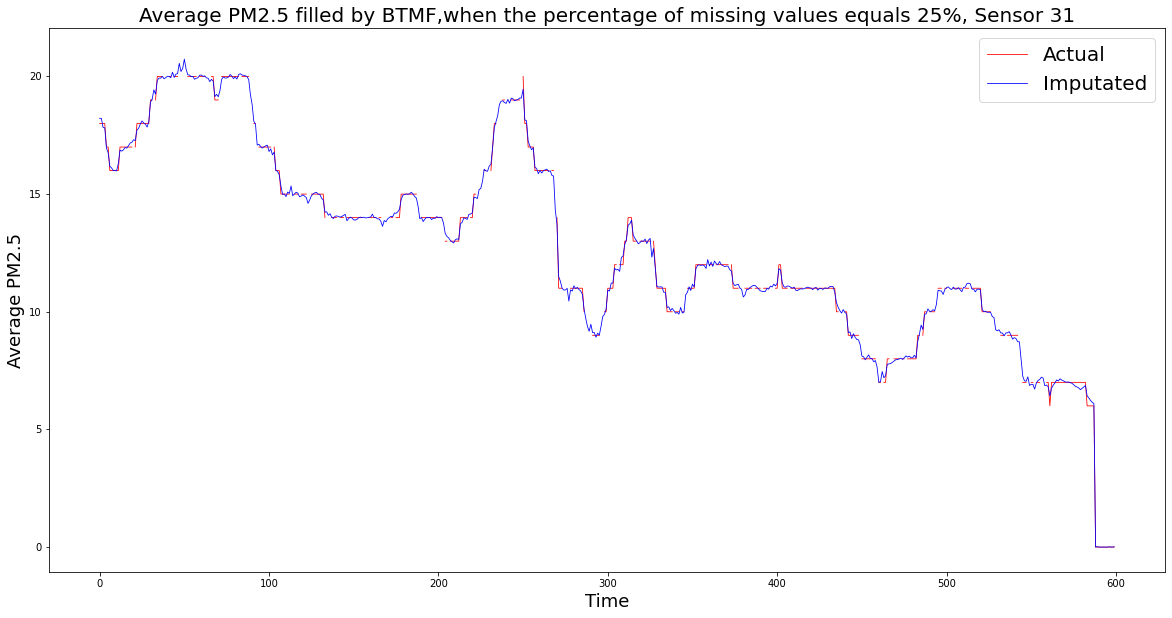

In [ ]:
plotTs(dense_mat[25], mat_hat[25], title='Average PM2.5 filled by BTMF,when the percentage of missing values equals 25%, Sensor 31')

In [ ]:
np.isnan(mat_hat).sum()

0

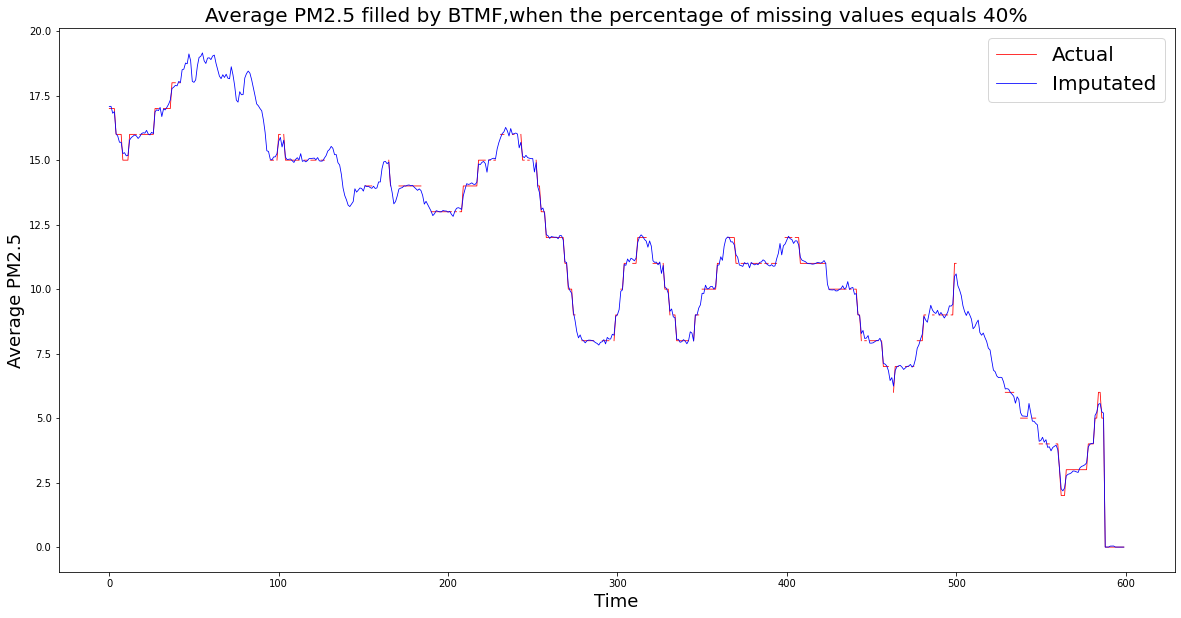

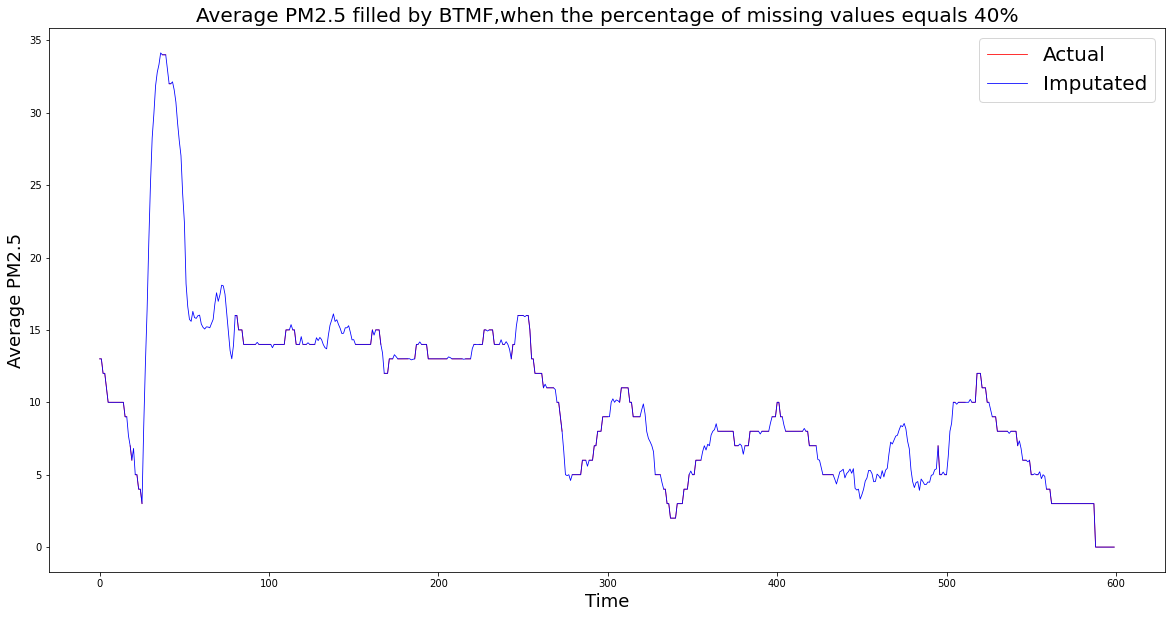

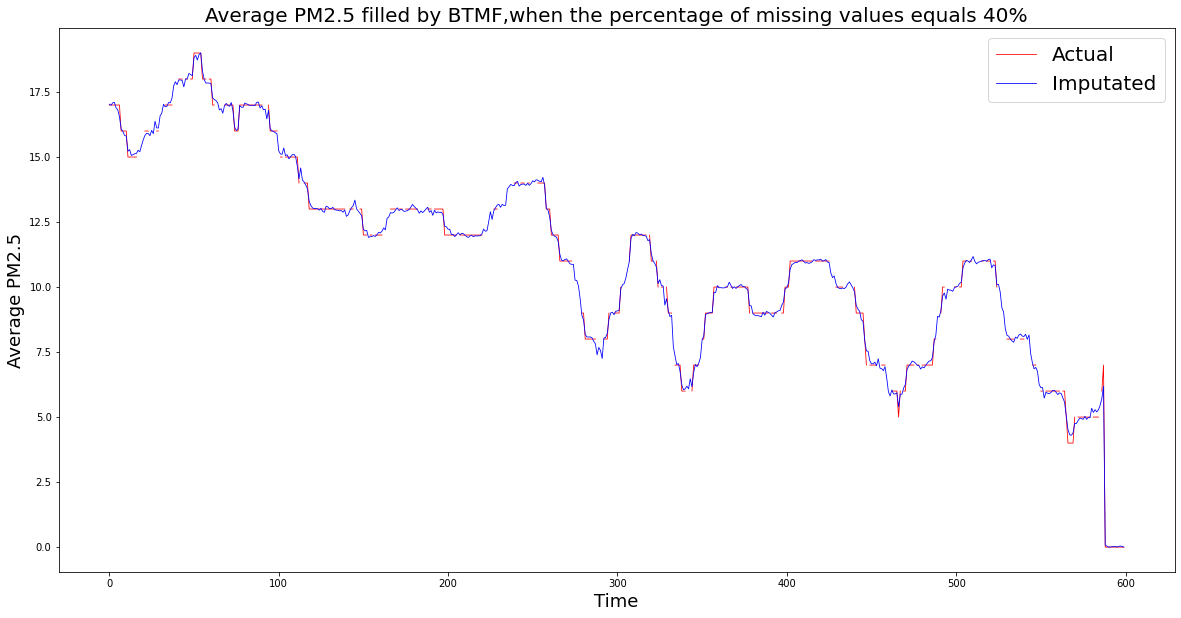

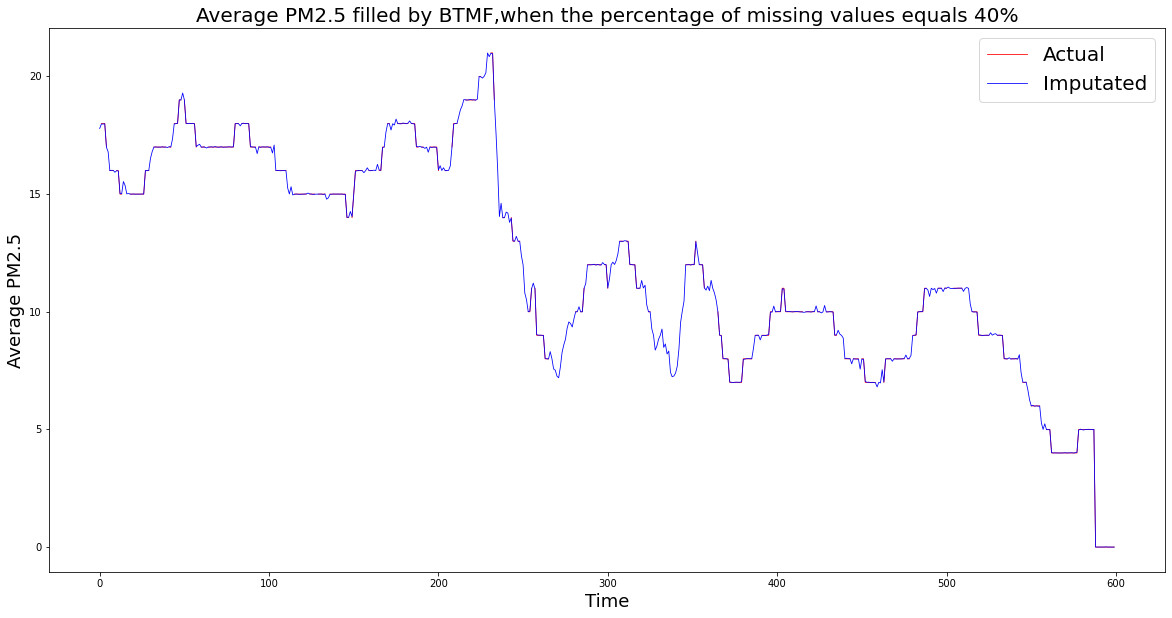

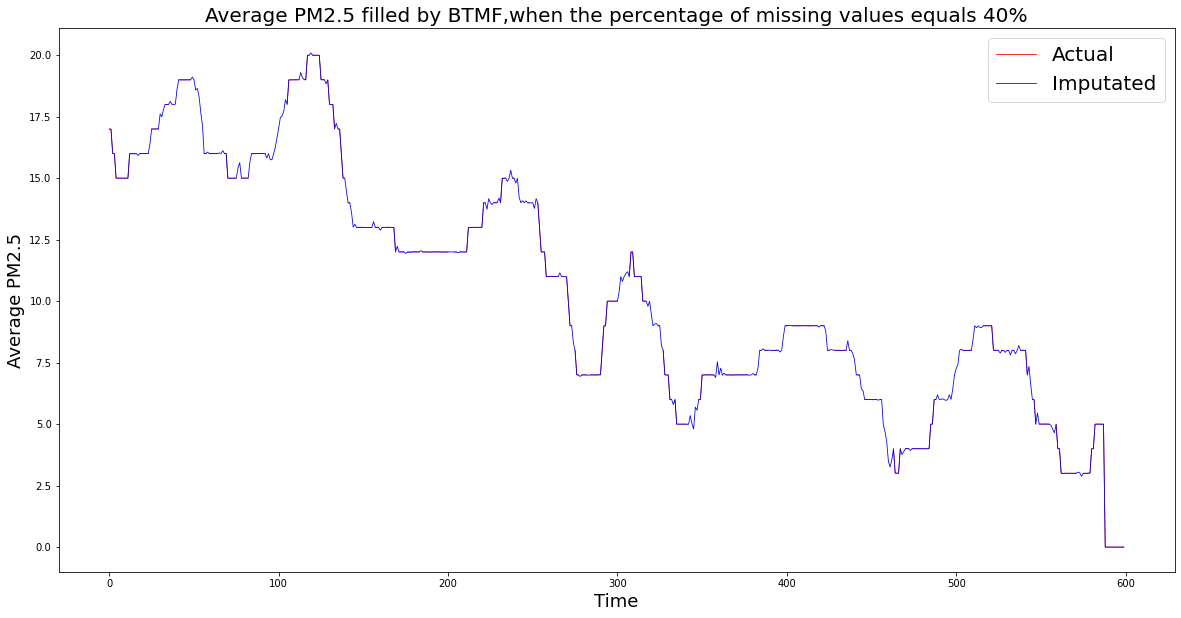

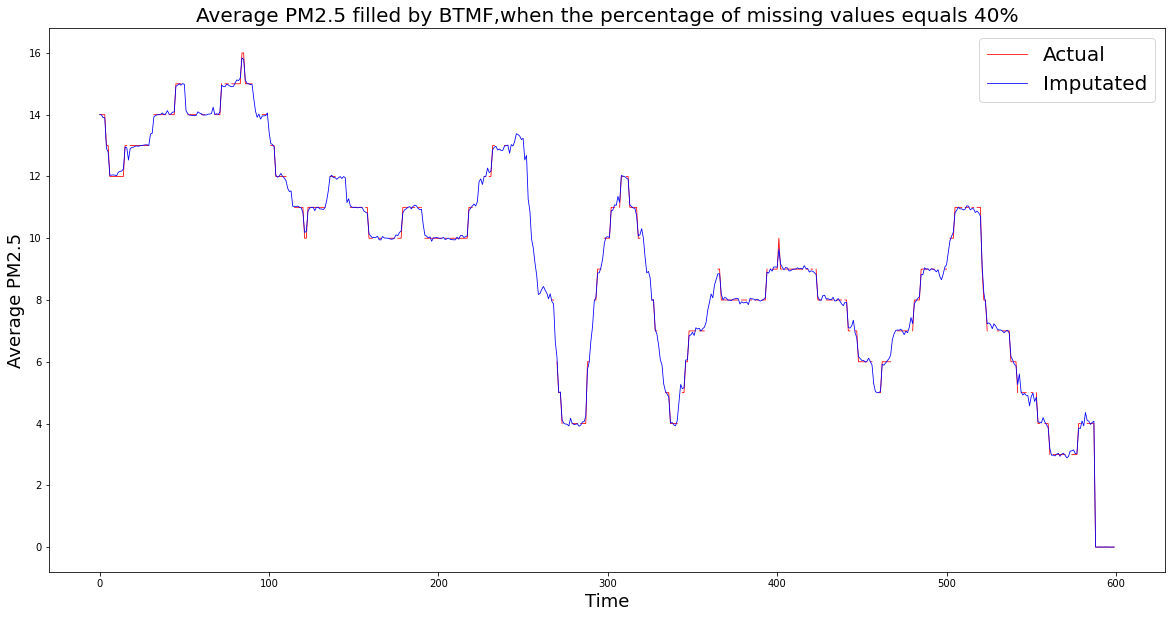

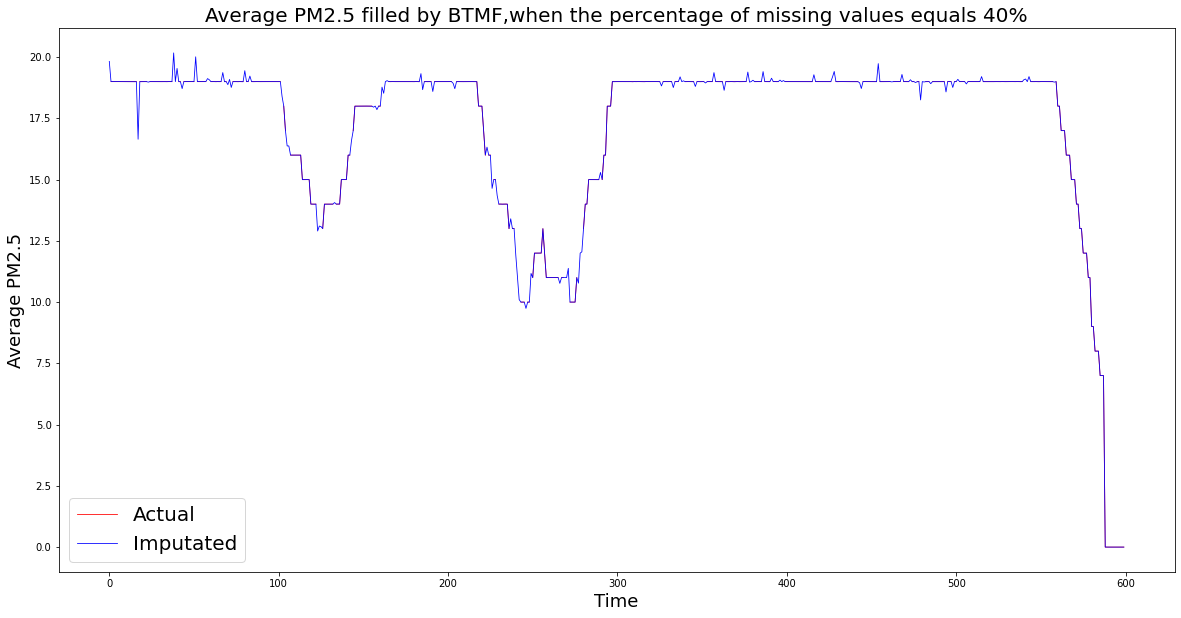

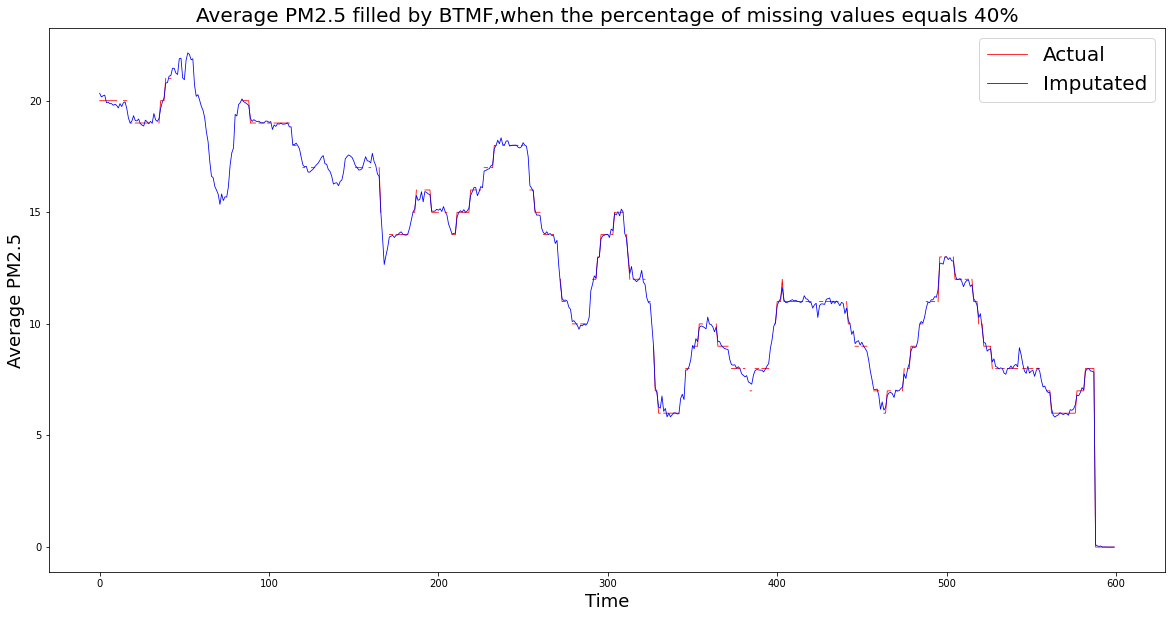

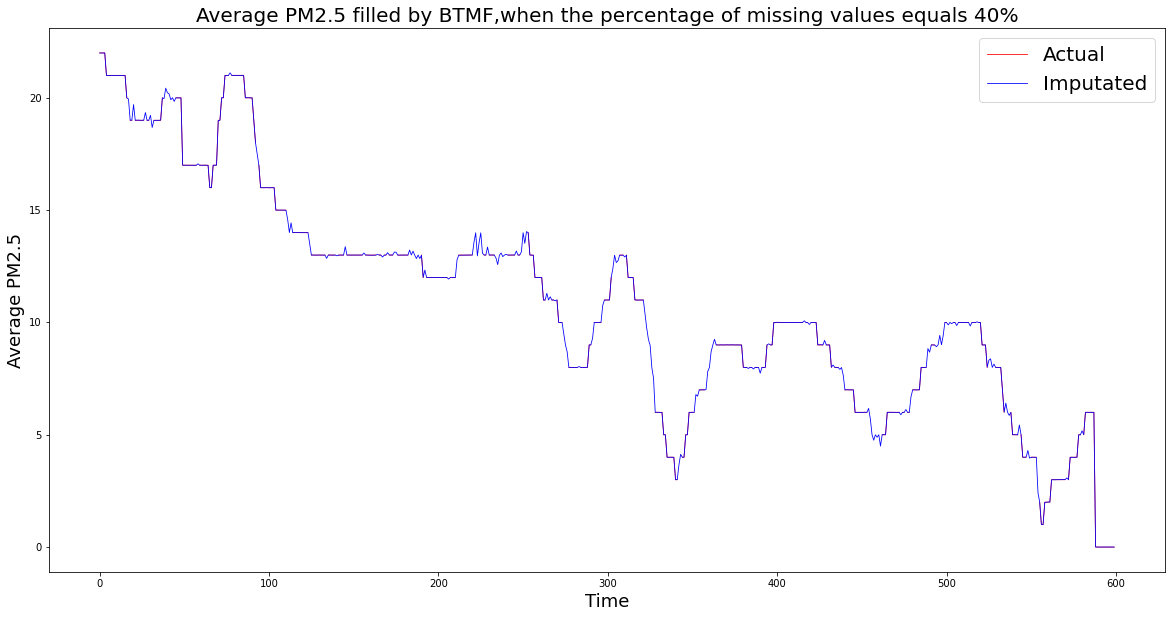

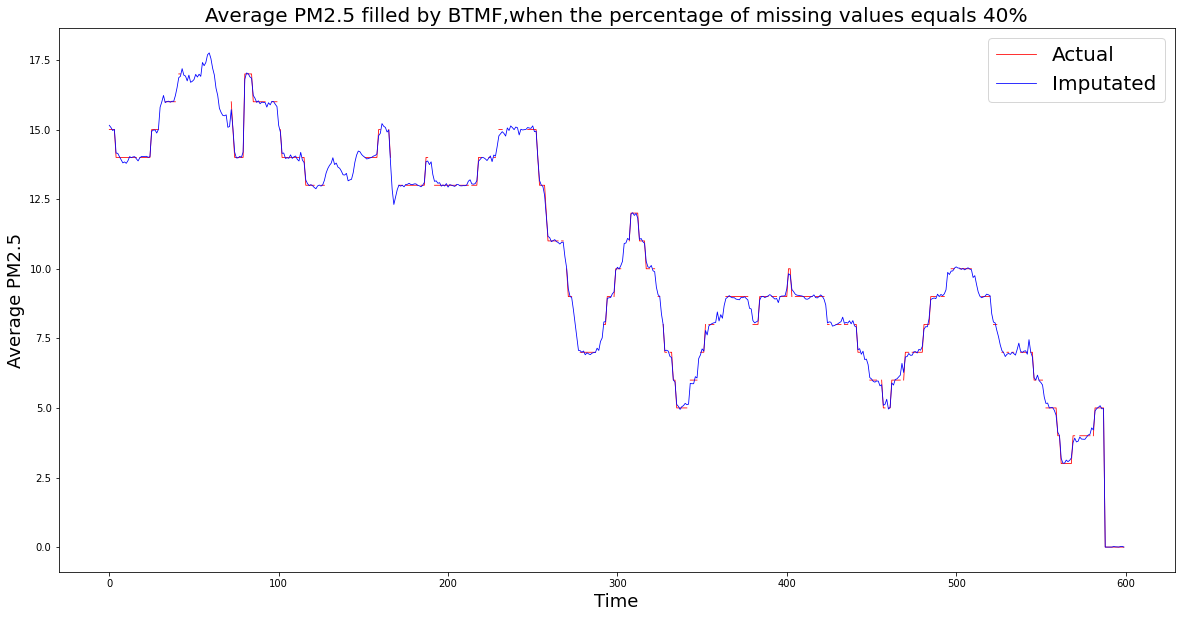

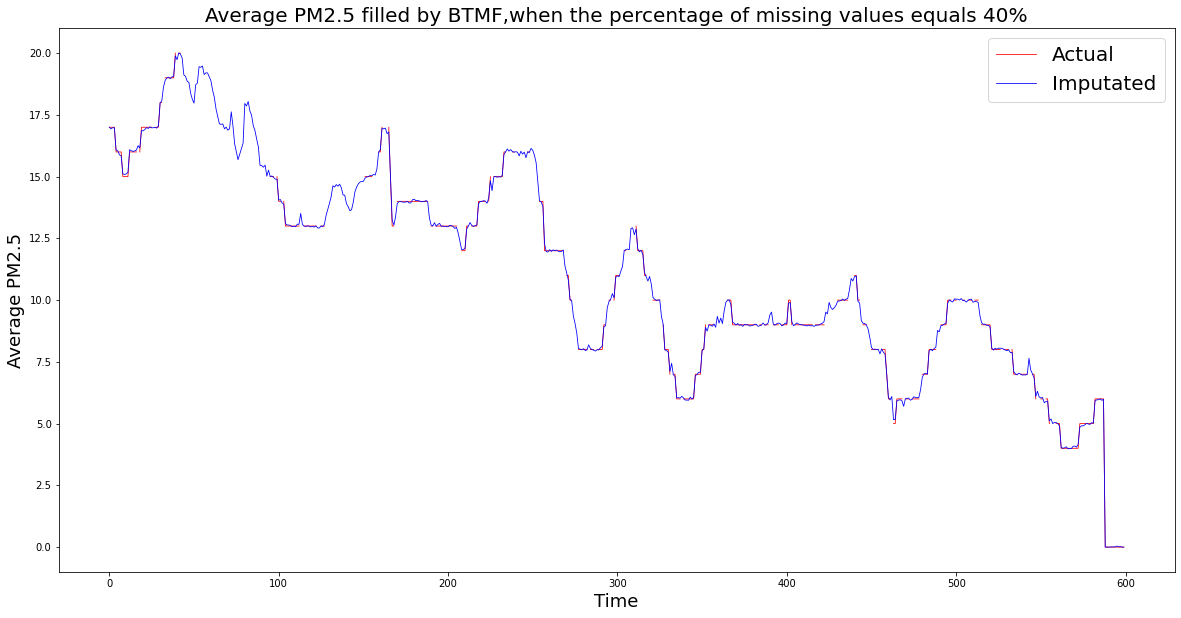

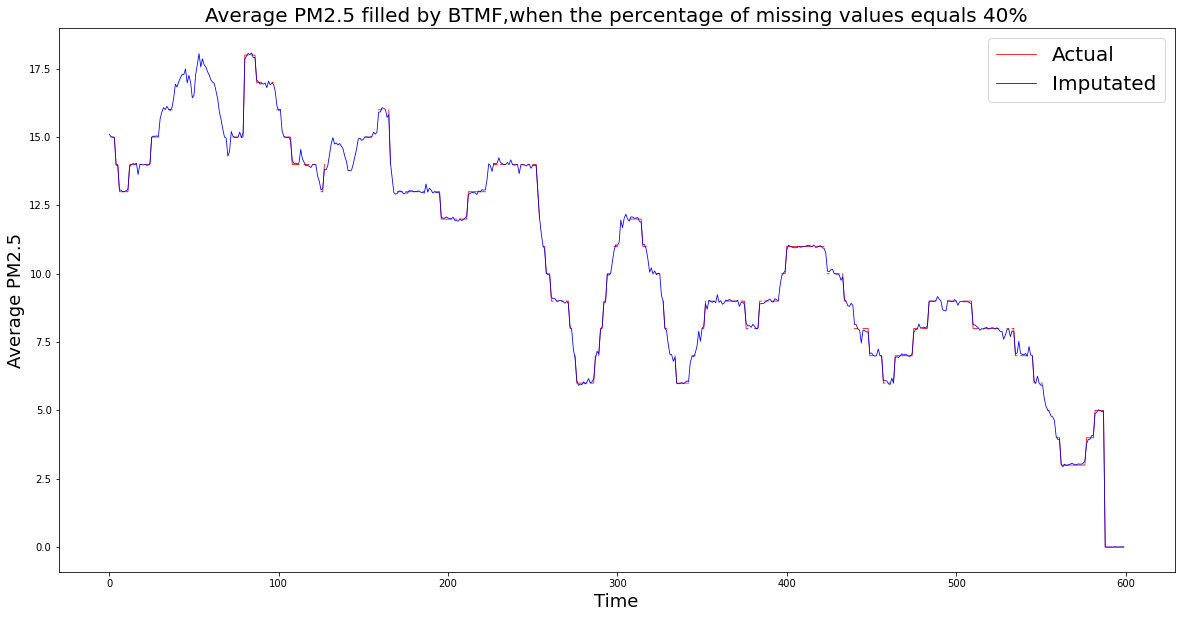

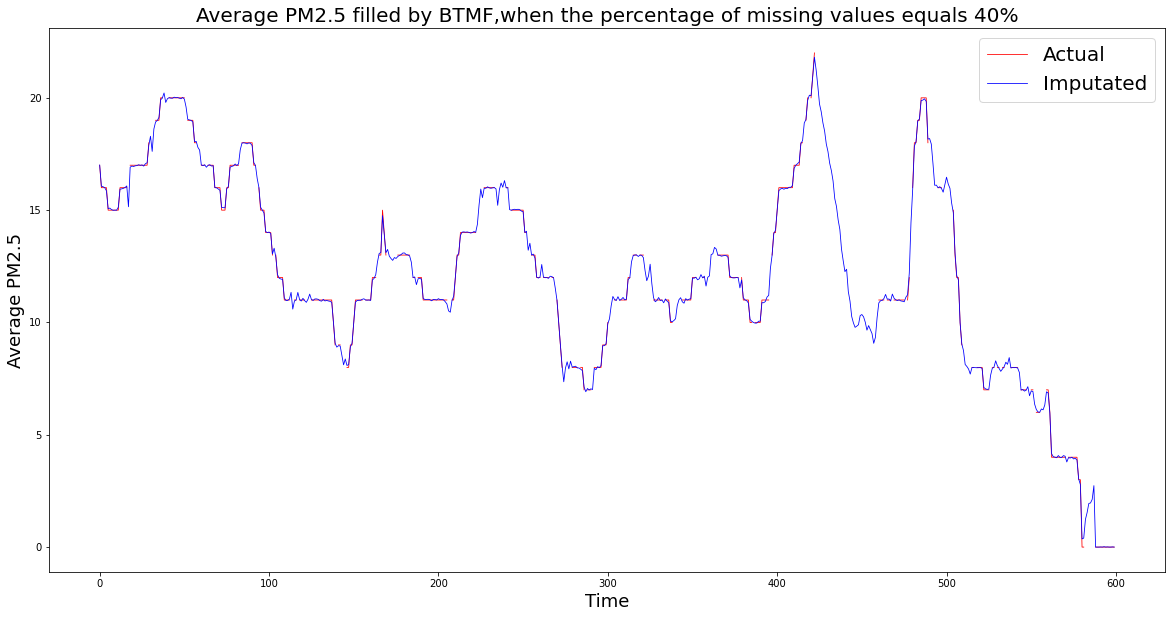

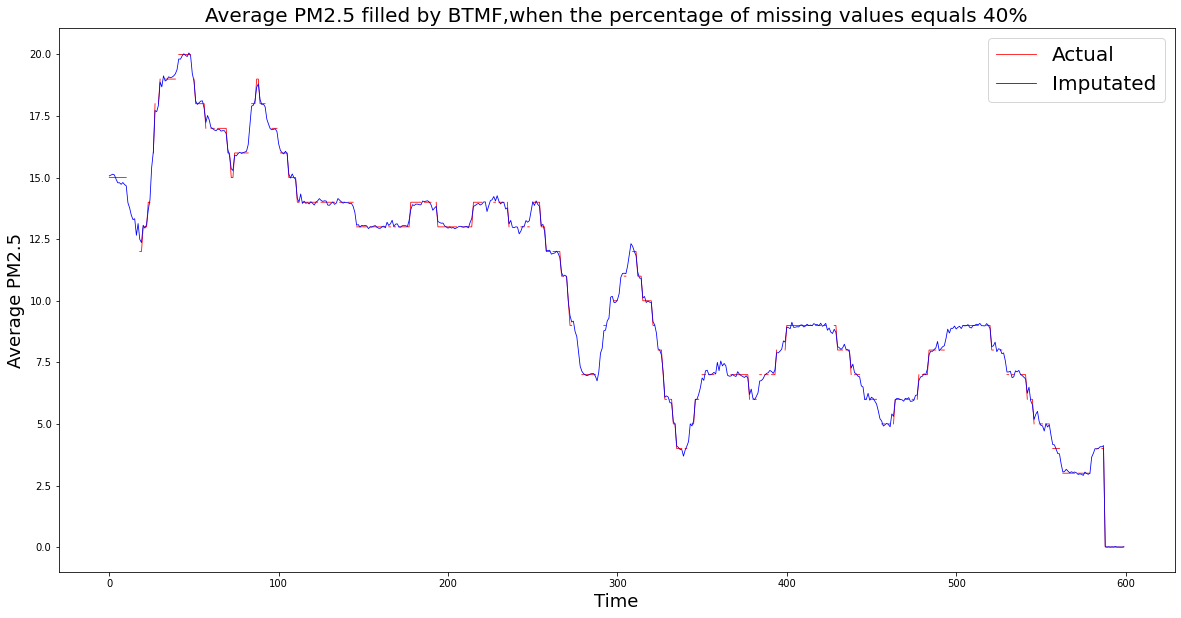

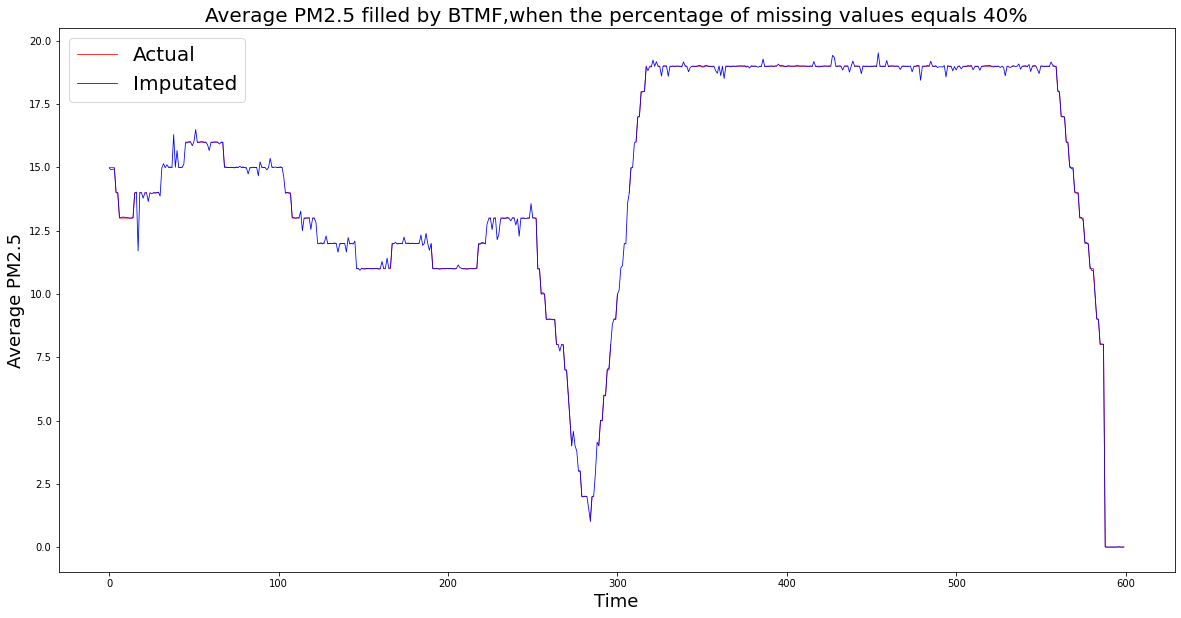

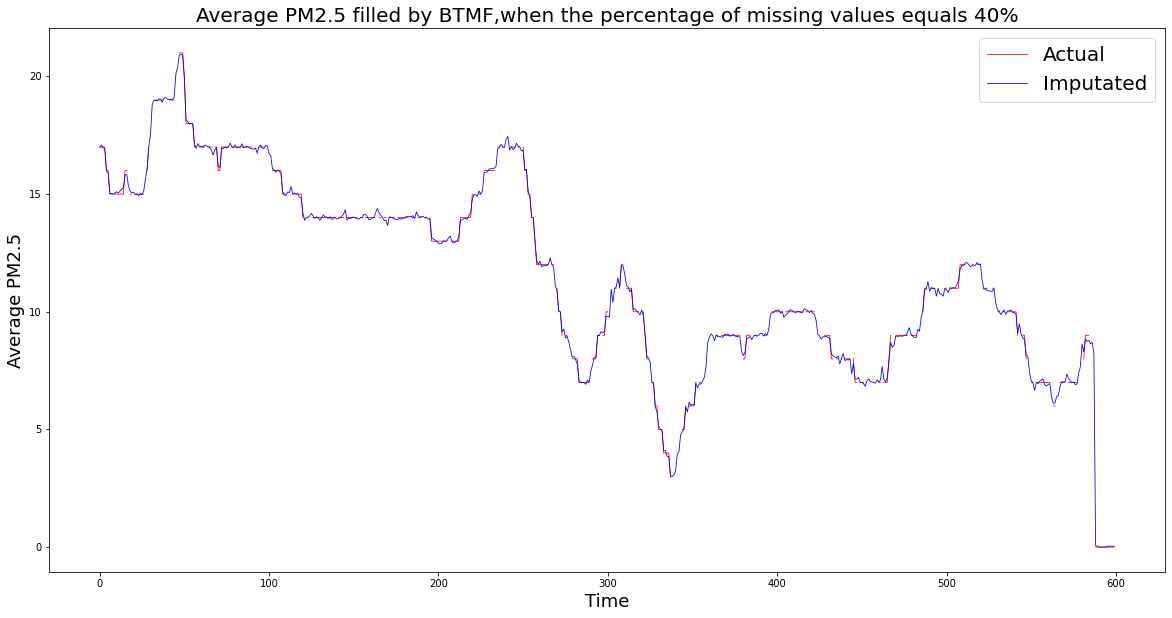

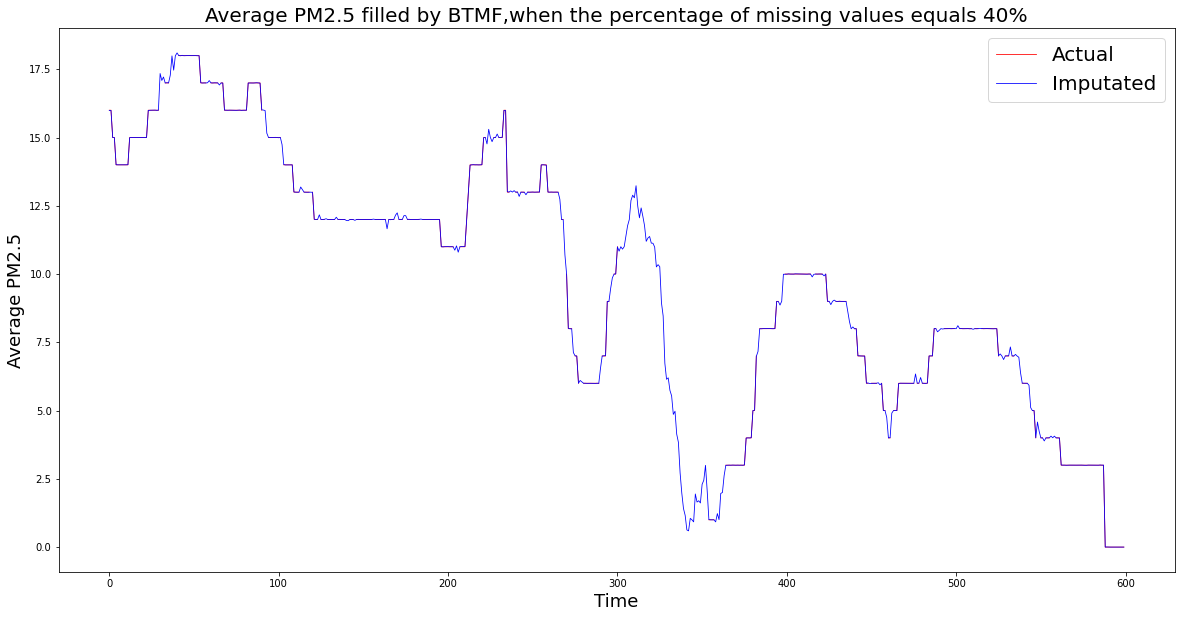

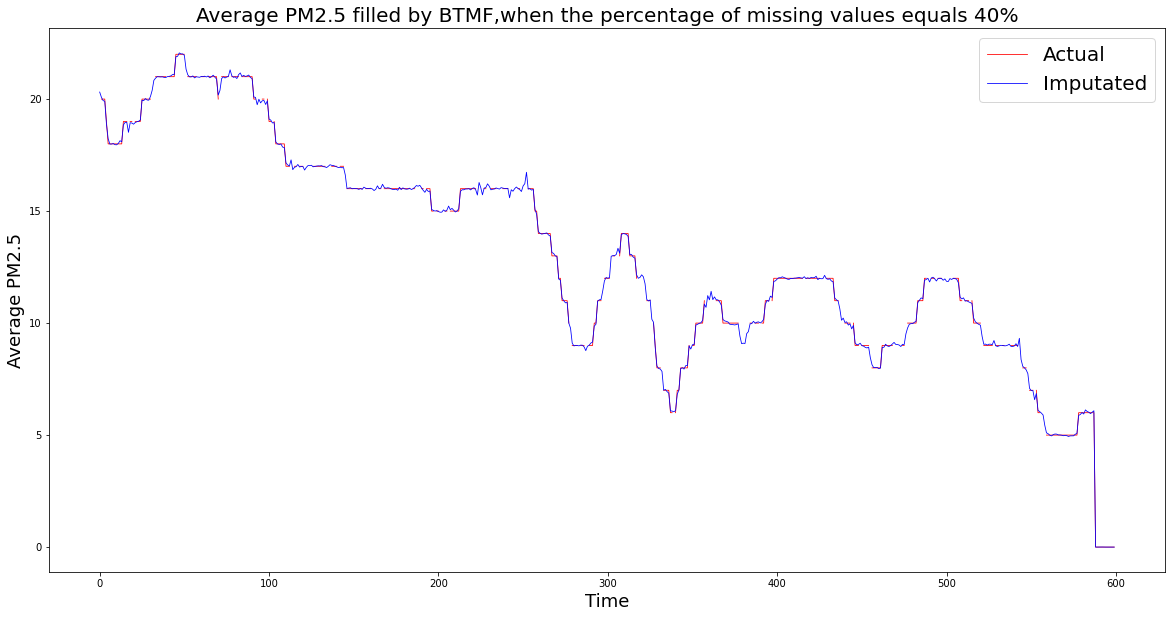

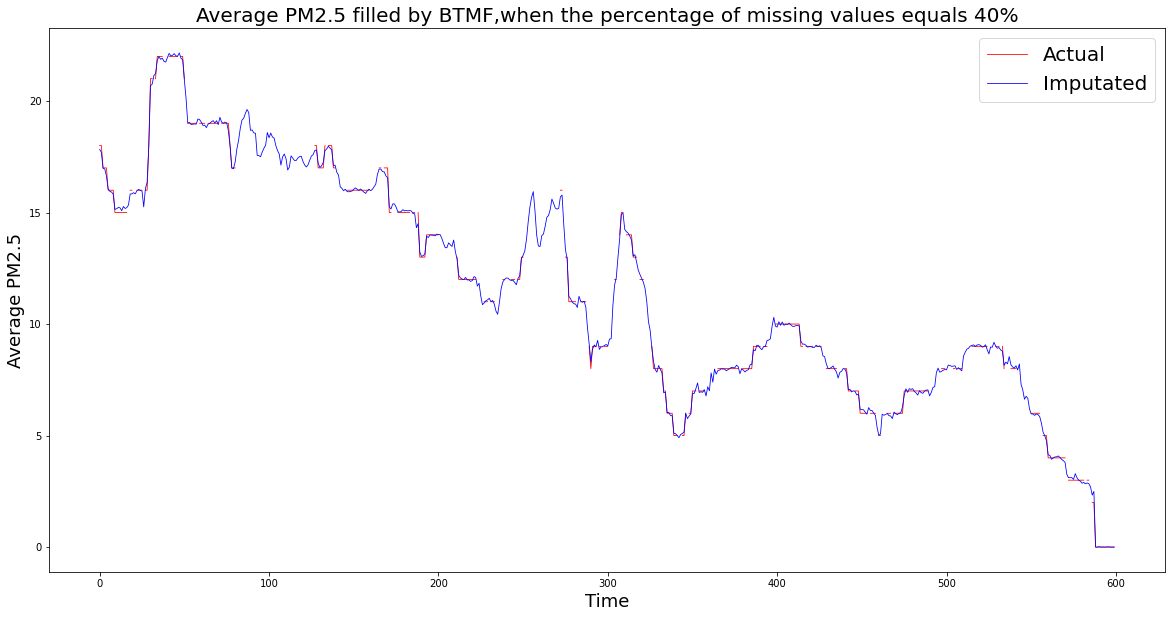

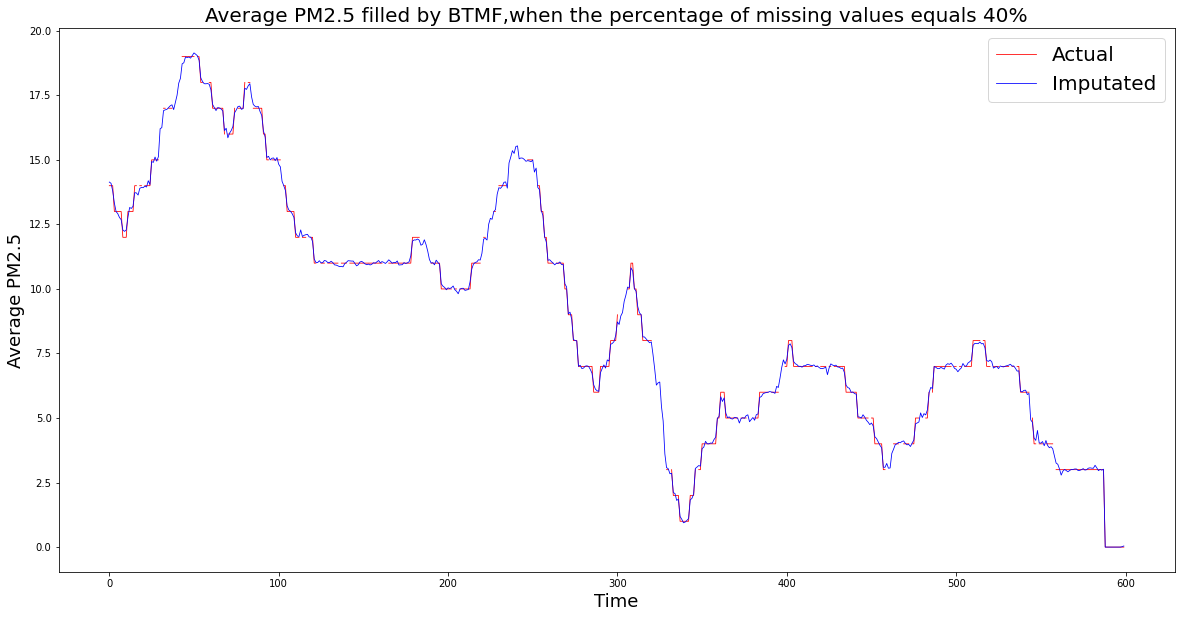

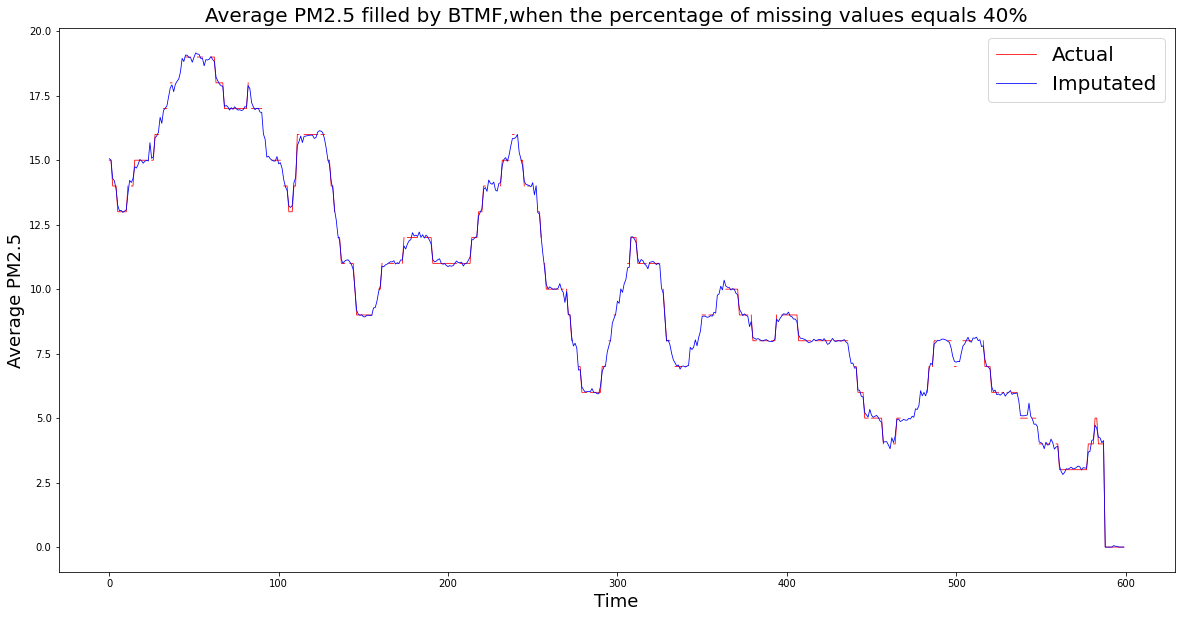

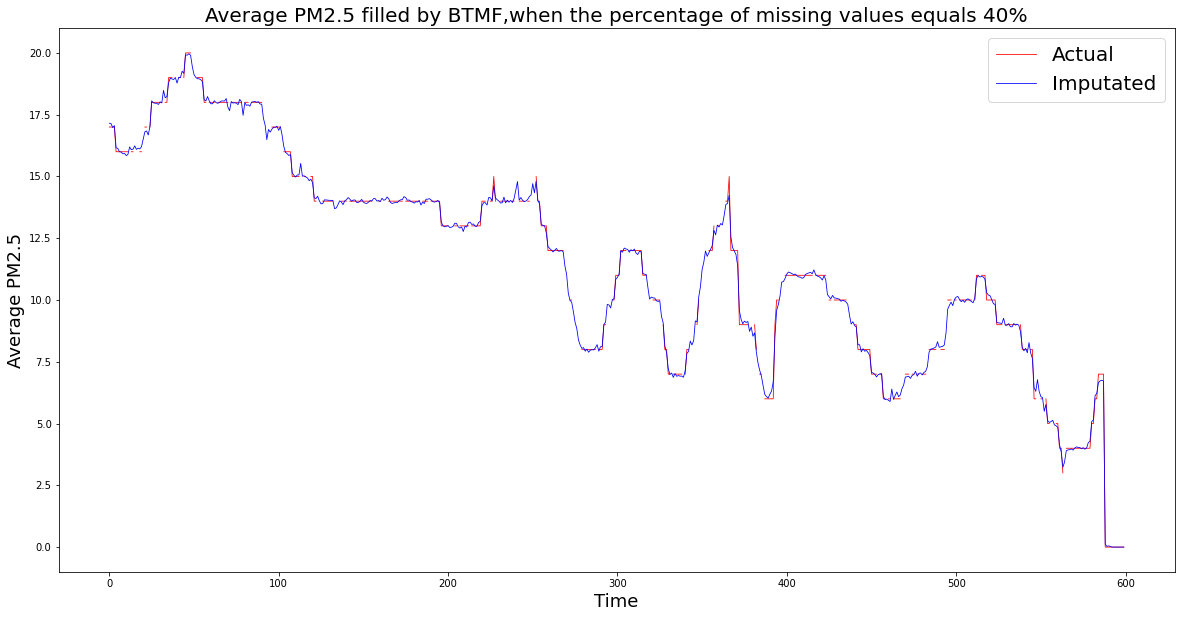

In [ ]:
for idx in range(0, round(dense_mat.shape[0]/2)):
  plotTs(dense_mat[idx], mat_hat[idx], title='Average PM2.5 filled by BTMF,when the percentage of missing values equals 40%')

# BTTF

In [ ]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from scipy.stats import invwishart
from numpy.linalg import solve as solve
from numpy.linalg import cholesky as cholesky_lower
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

In [ ]:

def sample_factor_u(tau_sparse_tensor, tau_ind, U, V, X, beta0 = 1):
    """Sampling M-by-R factor matrix U and its hyperparameters (mu_u, Lambda_u)."""
    
    dim1, rank = U.shape
    U_bar = np.mean(U, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_mu_hyper = temp * U_bar
    var_U_hyper = inv(np.eye(rank) + cov_mat(U, U_bar) + temp * beta0 * np.outer(U_bar, U_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_U_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim1 + beta0) * var_Lambda_hyper)

    var1 = kr_prod(X, V).T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ ten2mat(tau_ind, 0).T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, None]
    var4 = var1 @ ten2mat(tau_sparse_tensor, 0).T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
    for i in range(dim1):
        U[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
        
    return U

In [ ]:
def sample_factor_v(tau_sparse_tensor, tau_ind, U, V, X, beta0 = 1):
    """Sampling N-by-R factor matrix V and its hyperparameters (mu_v, Lambda_v)."""
    
    dim2, rank = V.shape
    V_bar = np.mean(V, axis = 0)
    temp = dim2 / (dim2 + beta0)
    var_mu_hyper = temp * V_bar
    var_V_hyper = inv(np.eye(rank) + cov_mat(V, V_bar) + temp * beta0 * np.outer(V_bar, V_bar))
    var_Lambda_hyper = wishart.rvs(df = dim2 + rank, scale = var_V_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim2 + beta0) * var_Lambda_hyper)

    var1 = kr_prod(X, U).T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ ten2mat(tau_ind, 1).T).reshape([rank, rank, dim2]) + var_Lambda_hyper[:, :, None]
    var4 = var1 @ ten2mat(tau_sparse_tensor, 1).T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
    for j in range(dim2):
        V[j, :] = mvnrnd_pre(solve(var3[:, :, j], var4[:, j]), var3[:, :, j])
        
    return V

In [ ]:
def sample_theta(X, theta, Lambda_x, time_lags, beta0 = 1):
    
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    theta_bar = np.mean(theta, axis = 0)
    temp = d / (d + beta0)
    var_theta_hyper = inv(np.eye(rank) + cov_mat(theta, theta_bar) 
                          + temp * beta0 * np.outer(theta_bar, theta_bar))
    var_Lambda_hyper = wishart.rvs(df = d + rank, scale = var_theta_hyper)
    var_mu_hyper = mvnrnd_pre(temp * theta_bar, (d + beta0) * var_Lambda_hyper)
    
    for k in range(d):
        theta0 = theta.copy()
        theta0[k, :] = 0
        mat0 = np.zeros((dim - tmax, rank))
        for L in range(d):
            mat0 += X[tmax - time_lags[L] : dim - time_lags[L], :] @ np.diag(theta0[L, :])
        varPi = X[tmax : dim, :] - mat0
        var0 = X[tmax - time_lags[k] : dim - time_lags[k], :]
        var = np.einsum('ij, jk, ik -> j', var0, Lambda_x, varPi)
        var_Lambda = np.einsum('ti, tj, ij -> ij', var0, var0, Lambda_x) + var_Lambda_hyper
        theta[k, :] = mvnrnd_pre(solve(var_Lambda, var + var_Lambda_hyper @ var_mu_hyper), var_Lambda)
        
    return theta

In [ ]:
def sample_Lambda_x(X, theta, time_lags):
    
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    mat = X[: tmax, :].T @ X[: tmax, :]
    temp = np.zeros((dim - tmax, rank, d))
    for k in range(d):
        temp[:, :, k] = X[tmax - time_lags[k] : dim - time_lags[k], :]
    new_mat = X[tmax : dim, :] - np.einsum('kr, irk -> ir', theta, temp)
    Lambda_x = wishart.rvs(df = dim + rank, scale = inv(np.eye(rank) + mat + new_mat.T @ new_mat))
    
    return Lambda_x

In [ ]:
def sample_factor_x(tau_sparse_tensor, tau_ind, time_lags, U, V, X, theta, Lambda_x):
    """Sampling T-by-R factor matrix X."""

    dim3, rank = X.shape
    tmax = np.max(time_lags)
    tmin = np.min(time_lags)
    d = time_lags.shape[0]
    A = np.zeros((d * rank, rank))
    for k in range(d):
        A[k * rank : (k + 1) * rank, :] = np.diag(theta[k, :])
    A0 = np.dstack([A] * d)
    for k in range(d):
        A0[k * rank : (k + 1) * rank, :, k] = 0
    mat0 = Lambda_x @ A.T
    mat1 = np.einsum('kij, jt -> kit', A.reshape([d, rank, rank]), Lambda_x)
    mat2 = np.einsum('kit, kjt -> ij', mat1, A.reshape([d, rank, rank]))
    
    var1 = kr_prod(V, U).T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ ten2mat(tau_ind, 2).T).reshape([rank, rank, dim3]) + Lambda_x[:, :, None]
    var4 = var1 @ ten2mat(tau_sparse_tensor, 2).T
    for t in range(dim3):
        Mt = np.zeros((rank, rank))
        Nt = np.zeros(rank)
        Qt = mat0 @ X[t - time_lags, :].reshape(rank * d)
        index = list(range(0, d))
        if t >= dim3 - tmax and t < dim3 - tmin:
            index = list(np.where(t + time_lags < dim3))[0]
        elif t < tmax:
            Qt = np.zeros(rank)
            index = list(np.where(t + time_lags >= tmax))[0]
        if t < dim3 - tmin:
            Mt = mat2.copy()
            temp = np.zeros((rank * d, len(index)))
            n = 0
            for k in index:
                temp[:, n] = X[t + time_lags[k] - time_lags, :].reshape(rank * d)
                n += 1
            temp0 = X[t + time_lags[index], :].T - np.einsum('ijk, ik -> jk', A0[:, :, index], temp)
            Nt = np.einsum('kij, jk -> i', mat1[index, :, :], temp0)
        
        var3[:, :, t] = var3[:, :, t] + Mt
        if t < tmax:
            var3[:, :, t] = var3[:, :, t] - Lambda_x + np.eye(rank)
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t] + Nt + Qt), var3[:, :, t])

    return X

In [ ]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [ ]:
def BTRTF(dense_tensor, sparse_tensor, init, rank, time_lags, burn_iter, gibbs_iter):
    """Bayesian Temporal Regularized Tensor Factorization, BTRTF."""
    
    dim1, dim2, dim3 = sparse_tensor.shape
    d = time_lags.shape[0]
    U = init["U"]
    V = init["V"]
    X = init["X"]
    theta = 0.01 * np.random.randn(d, rank)
    if np.isnan(sparse_tensor).any() == False:
        ind = sparse_tensor != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_tensor != 0) & (sparse_tensor == 0))
    elif np.isnan(sparse_tensor).any() == True:
        pos_test = np.where((dense_tensor != 0) & (np.isnan(sparse_tensor)))
        ind = ~np.isnan(sparse_tensor)
        pos_obs = np.where(ind)
        sparse_tensor[np.isnan(sparse_tensor)] = 0
    dense_test = dense_tensor[pos_test]
    del dense_tensor
    U_plus = np.zeros((dim1, rank))
    V_plus = np.zeros((dim2, rank))
    X_plus = np.zeros((dim3, rank))
    theta_plus = np.zeros((d, rank))
    temp_hat = np.zeros(len(pos_test[0]))
    show_iter = 200
    tau = 1
    tensor_hat_plus = np.zeros(sparse_tensor.shape)
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau * ind
        tau_sparse_tensor = tau * sparse_tensor
        U = sample_factor_u(tau_sparse_tensor, tau_ind, U, V, X)
        V = sample_factor_v(tau_sparse_tensor, tau_ind, U, V, X)
        Lambda_x = sample_Lambda_x(X, theta, time_lags)
        theta = sample_theta(X, theta, Lambda_x, time_lags)
        X = sample_factor_x(tau_sparse_tensor, tau_ind, time_lags, U, V, X, theta, Lambda_x)
        tensor_hat = np.einsum('is, js, ts -> ijt', U, V, X)
        tau = np.random.gamma(1e-6 + 0.5 * np.sum(ind), 
                              1 / (1e-6 + 0.5 * np.sum(((sparse_tensor - tensor_hat) ** 2) * ind)))
        temp_hat += tensor_hat[pos_test]
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat)))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat)))
            temp_hat = np.zeros(len(pos_test[0]))
            print()
        if it + 1 > burn_iter:
            U_plus += U
            V_plus += V
            X_plus += X
            theta_plus += theta
            tensor_hat_plus += tensor_hat
    tensor_hat = tensor_hat_plus / gibbs_iter
    U = U_plus / gibbs_iter
    V = V_plus / gibbs_iter
    X = X_plus / gibbs_iter
    theta = theta_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, tensor_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, tensor_hat[pos_test])))
    print()
    
    return tensor_hat, U, V, X, theta

## Random Missing tests

In [ ]:
import scipy.io

dense_tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
rm_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.3

## Random missing (RM)
binary_tensor = np.round(rm_tensor + 0.5 - missing_rate)
sparse_tensor = dense_tensor.copy()
sparse_tensor[binary_tensor == 0] = np.nan

In [ ]:
import time
start = time.time()
dim1, dim2, dim3 = sparse_tensor.shape
rank = 30
time_lags = np.array([1, 2, 10])
init = {"U": 0.1 * np.random.randn(dim1, rank), "V": 0.1 * np.random.randn(dim2, rank),
        "X": 0.1 * np.random.randn(dim3, rank)}
burn_iter = 1000
gibbs_iter = 200
tensor_hat, U, V, X, theta = BTRTF(dense_tensor, sparse_tensor, init, rank, time_lags, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: 0.121012
RMSE: 6.16332

Iter: 400
MAPE: 0.108821
RMSE: 9.87376

Iter: 600
MAPE: 0.107971
RMSE: 11.707

Iter: 800
MAPE: 0.106989
RMSE: 9.44899

Iter: 1000
MAPE: 0.102107
RMSE: 7.42647

Imputation MAPE: 0.0978058
Imputation RMSE: 5.74003

Running time: 31 seconds


In [ ]:
dense_tensor.shape

(43, 11, 25)

In [ ]:
dense_tensor[0,1], tensor_hat[0,1]

(array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
        7., 7., 5., 5., 5., 5., 6., 6.]),
 array([6.31909367, 6.31318333, 6.30360554, 6.36053652, 6.30245298,
        6.29442777, 6.20588293, 6.21755593, 6.21404364, 6.2500421 ,
        6.23678923, 6.23064566, 6.41663443, 6.35829395, 6.38150578,
        6.27108626, 6.2580117 , 6.21954918, 6.25316648, 5.45601308,
        5.39656826, 5.33676603, 5.54710573, 5.63635035, 5.5169271 ]))

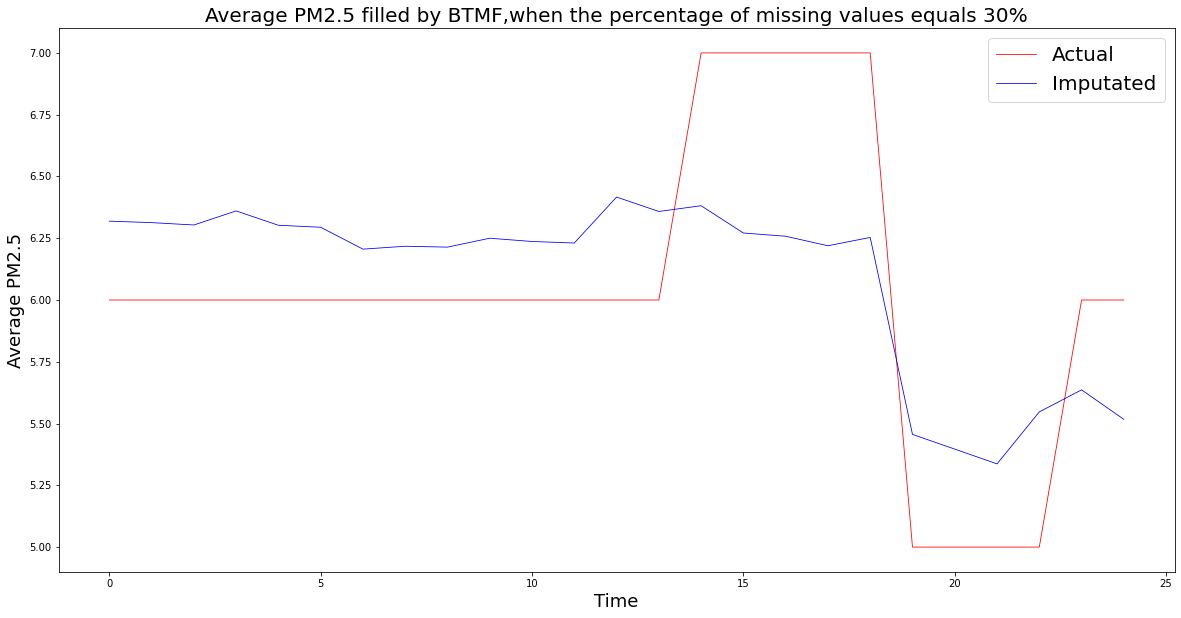

In [ ]:
plotTs(dense_tensor[0,1], tensor_hat[0,1], title='Average PM2.5 filled by BTMF,when the percentage of missing values equals 30%')

#  Low-Rank Tensor Completion with Truncated Nuclear Norm minimization (LRTC-TNN)

In [ ]:
import numpy as np
from numpy.linalg import inv as inv

In [ ]:
def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

In [ ]:
def mat2ten(mat, tensor_size, mode):
    index = list()
    index.append(mode)
    for i in range(tensor_size.shape[0]):
        if i != mode:
            index.append(i)
    return np.moveaxis(np.reshape(mat, list(tensor_size[index]), order = 'F'), 0, mode)

In [ ]:

def svt_tnn(mat, alpha, rho, theta):
    """This is a Numpy dependent singular value thresholding (SVT) process."""
    u, s, v = np.linalg.svd(mat, full_matrices = 0)
    vec = s.copy()
    vec[theta :] = s[theta :] - alpha / rho
    vec[vec < 0] = 0
    return np.matmul(np.matmul(u, np.diag(vec)), v)

In [ ]:
def svt_tnn(mat, alpha, rho, theta):
    tau = alpha / rho
    [m, n] = mat.shape
    if 2 * m < n:
        u, s, v = np.linalg.svd(mat @ mat.T, full_matrices = 0)
        s = np.sqrt(s)
        idx = np.sum(s > tau)
        mid = np.zeros(idx)
        mid[:theta] = 1
        mid[theta:idx] = (s[theta:idx] - tau) / s[theta:idx]
        return (u[:, :idx] @ np.diag(mid)) @ (u[:, :idx].T @ mat)
    elif m > 2 * n:
        return svt_tnn(mat.T, tau, theta).T
    u, s, v = np.linalg.svd(mat, full_matrices = 0)
    idx = np.sum(s > tau)
    vec = s[:idx].copy()
    vec[theta:idx] = s[theta:idx] - tau
    return u[:, :idx] @ np.diag(vec) @ v[:idx, :]

In [ ]:
def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [ ]:

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

In [ ]:
def LRTC(dense_tensor, sparse_tensor, alpha, rho, theta, epsilon, maxiter):
    """Low-Rank Tenor Completion with Truncated Nuclear Norm, LRTC-TNN."""
    
    dim = np.array(sparse_tensor.shape)
    pos_missing = np.where(sparse_tensor == 0)
    pos_test = np.where((dense_tensor != 0) & (sparse_tensor == 0))
    
    X = np.zeros(np.insert(dim, 0, len(dim))) # \boldsymbol{\mathcal{X}}
    T = np.zeros(np.insert(dim, 0, len(dim))) # \boldsymbol{\mathcal{T}}
    Z = sparse_tensor.copy()
    last_tensor = sparse_tensor.copy()
    snorm = np.sqrt(np.sum(sparse_tensor ** 2))
    it = 0
    while True:
        rho = min(rho * 1.05, 1e5)
        for k in range(len(dim)):
            X[k] = mat2ten(svt_tnn(ten2mat(Z - T[k] / rho, k), alpha[k], rho, np.int(np.ceil(theta * dim[k]))), dim, k)
        Z[pos_missing] = np.mean(X + T / rho, axis = 0)[pos_missing]
        T = T + rho * (X - np.broadcast_to(Z, np.insert(dim, 0, len(dim))))
        tensor_hat = np.einsum('k, kmnt -> mnt', alpha, X)
        tol = np.sqrt(np.sum((tensor_hat - last_tensor) ** 2)) / snorm
        last_tensor = tensor_hat.copy()
        it += 1
        if (it + 1) % 50 == 0:
            print('Iter: {}'.format(it + 1))
            print('RMSE: {:.6}'.format(compute_rmse(dense_tensor[pos_test], tensor_hat[pos_test])))
            print()
        if (tol < epsilon) or (it >= maxiter):
            break

    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_tensor[pos_test], tensor_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_tensor[pos_test], tensor_hat[pos_test])))
    print()
    
    return tensor_hat

## Random missing tests

In [ ]:
tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/tensor.mat')
dense_tensor = tensor['tensor']
random_tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_tensor.mat')
random_tensor = random_tensor['random_tensor']

In [ ]:
import scipy.io

dense_tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])


missing_rate = 0.2

# =============================================================================
### Random missing (RM) scenario:
binary_tensor = np.round(random_tensor + 0.5 - missing_rate)
# =============================================================================

sparse_tensor = np.multiply(dense_tensor, binary_tensor)

In [ ]:
dense_tensor.shape, sparse_tensor.shape

((43, 17, 25), (43, 17, 25))

Model setting:

$\boldsymbol{\alpha}=\left(\frac{1}{3},\frac{1}{3},\frac{1}{3}\right)$
$\rho=10^{-5}$
$\epsilon =10^{-4}$
The number of iterations: 200

In [ ]:

import time
start = time.time()
alpha = np.ones(3) / 3
rho = 1e-5
theta = 0.30
epsilon = 1e-4
maxiter = 200
LRTC(dense_tensor, sparse_tensor, alpha, rho, theta, epsilon, maxiter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Imputation MAPE: 1.0
Imputation RMSE: 12.7522

Running time: 0 seconds
